<a href="https://www.kaggle.com/code/allanyengsnxmwas/crop-yield-wraggling?scriptVersionId=280312374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [2]:
# load the dataset and any imports 
# Install dependencies as needed:
# Set the path to the file you'd like to load
file_path = "/kaggle/input/crop-yield-prediction-dataset/yield_df.csv"
data_crop=pd.read_csv(file_path)
# print the first five 
print( "The first few rows" )
# data_crop.head()
print(data_crop)

The first few rows
       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121

In [3]:
# Drop the unammed column and also reset the idndex
data_crop_na = data_crop.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
data_crop_na


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [4]:
# print(data_crop)  
Data_crop=data_crop_na.describe()
Data_crop

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


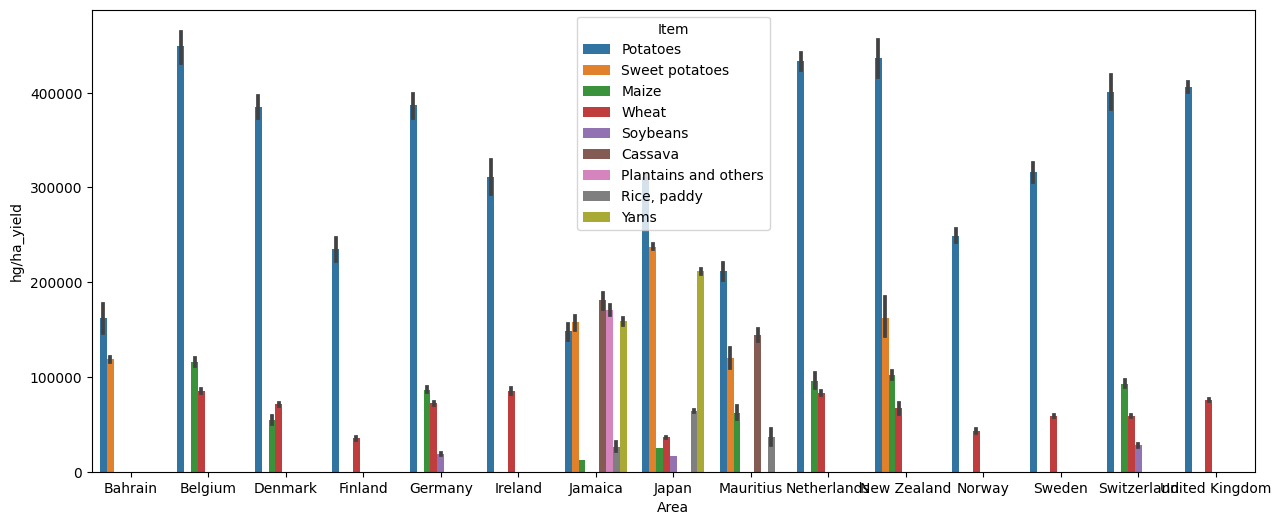

<Figure size 640x480 with 0 Axes>

In [5]:
# import seadborn and plotypy / visualization tools needed 
import matplotlib.pyplot as plt
import seaborn as sns
top_areas = data_crop.groupby("Area")["hg/ha_yield"].mean().sort_values(ascending=False).head(15).index
filtered = data_crop[data_crop["Area"].isin(top_areas)]
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered, y="hg/ha_yield", x="Area", hue="Item")
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
plt.savefig("crop_yield.png", dpi=300, bbox_inches='tight')

